In [8]:
#import Necessary Libraries 
# if not installed Use pip install Library_name to install
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

* client has given the raw data set named as DSataset.csv which is in csv format.
* Load the data set into a variable as dataframe alias df

In [9]:
#load the dataset into a variable "Data Frame" as 'df'
df=pd.read_csv("DSataset.csv")

In [10]:
df.head() # to check the data is loaded to the dataframe or not.

,Feature_X,Feature_Y,Feature_Z,Category
0,1.001145e+06,42.890758,500574.881706,A
1,1.003279e+06,42.011254,501644.844079,B
2,1.003890e+06,45.105198,501953.689101,B
3,1.001228e+06,31.601385,500627.233166,C
4,1.001700e+06,40.059878,500855.181787,C


* the details given by the client **feature_x** is **'order_value'**, **feature_y** is **'unit_price'** and **feature_z** is  **'gross_profit'**.
* so, rename the dataframe according to the details give by the client


In [11]:
df.rename(columns={
    'Feature_X': 'Order_Value',
    'Feature_Y': 'Unit_Price',
    'Feature_Z': 'Gross_Profit',
    'Category': 'Product_Category'
},inplace=True)

In [12]:
df.head() #to verify the is my dataset is renamed or not?

,Order_Value,Unit_Price,Gross_Profit,Product_Category
0,1.001145e+06,42.890758,500574.881706,A
1,1.003279e+06,42.011254,501644.844079,B
2,1.003890e+06,45.105198,501953.689101,B
3,1.001228e+06,31.601385,500627.233166,C
4,1.001700e+06,40.059878,500855.181787,C


In [13]:
df.describe() #to understand the data

,Order_Value,Unit_Price,Gross_Profit
count,9.700000e+03,9700.000000,10000.000000
mean,9.783752e+05,53.513129,474527.432182
std,1.552787e+05,114.925200,113188.586423
min,1.002000e+03,5.662530,-13.393423
25%,1.001424e+06,27.025469,500660.408737
50%,1.003082e+06,33.756549,501509.567320
75%,1.004447e+06,44.159628,502218.703628
max,1.006042e+06,997.000000,503235.820591


 * by this describe function unable to understand the data due to more decimal points.
 * so i am formating the decimal points as 2 decimal points.
   

In [14]:
# to understand the data we are modifying the display format
pd.options.display.float_format = '{:.2f}'.format

In [15]:
df.head() #verifying is updated on the data frame or not

,Order_Value,Unit_Price,Gross_Profit,Product_Category
0,1001144.51,42.89,500574.88,A
1,1003279.29,42.01,501644.84,B
2,1003890.36,45.11,501953.69,B
3,1001227.86,31.60,500627.23,C
4,1001699.61,40.06,500855.18,C


In [16]:
df.describe() #to understand the data

,Order_Value,Unit_Price,Gross_Profit
count,9700.00,9700.00,10000.00
mean,978375.19,53.51,474527.43
std,155278.68,114.93,113188.59
min,1002.00,5.66,-13.39
25%,1001423.92,27.03,500660.41
50%,1003081.71,33.76,501509.57
75%,1004447.45,44.16,502218.70
max,1006042.02,997.00,503235.82


* to make more meaning i am adding order id and no. of units

In [17]:
# Create a unique Order_ID for each row
df['Order_ID'] = range(1, len(df) + 1)
# Calculate the Number of Units sold
# We divide the total order value by the price per unit as we have total order value.
df['Number_of_Units'] = df['Order_Value'] / df['Unit_Price']

In [18]:
df.head()# verifying is my new columns are affected in my data frame or not.

,Order_Value,Unit_Price,Gross_Profit,Product_Category,Order_ID,Number_of_Units
0,1001144.51,42.89,500574.88,A,1,23341.73
1,1003279.29,42.01,501644.84,B,2,23881.20
2,1003890.36,45.11,501953.69,B,3,22256.64
3,1001227.86,31.60,500627.23,C,4,31683.04
4,1001699.61,40.06,500855.18,C,5,25005.06


In [19]:
# checking for is there are any null values exists in a data frame or not
df.isnull().sum()

Order_Value         300
Unit_Price          300
Gross_Profit          0
Product_Category      0
Order_ID              0
Number_of_Units     600
dtype: int64

* by taking cosideration if  order_value or  unit_price is null, The number_of_units also null.
* so, i am replacing the null rows in the number_of_units as zero and modifying the entire column with floor values/integer values
* replacing the null values in the order_value and Unit_price with median to make consistance in the data.

In [20]:
df['Number_of_Units'] = df['Number_of_Units'].fillna(0).round(0).astype(int)

In [21]:
for i in ['Order_Value','Unit_Price']:
    df[i].fillna(df[i].median(), inplace=True)

C:\Users\gandu\AppData\Local\Temp\ipykernel_32388\76316612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\gandu\AppData\Local\Temp\ipykernel_32388\76316612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

* update the Order_value again for consistancy in the data data frame

In [22]:
# recalculate the Order_Value to make it consistent. This ensures your analysis is accurate 
# Recalculate Order_Value based on the whole number of units
df['Order_Value'] = df['Unit_Price'] * df['Number_of_Units']


* Reorder all columns for a clean, logical layout

In [23]:

final_columns = [
    'Order_ID',
    'Product_Category',
    'Unit_Price',
    'Number_of_Units',
    'Order_Value',
    'Gross_Profit'
]
df = df[final_columns]

In [24]:
df.head()

,Order_ID,Product_Category,Unit_Price,Number_of_Units,Order_Value,Gross_Profit
0,1,A,42.89,23342,1001156.08,500574.88
1,2,B,42.01,23881,1003270.75,501644.84
2,3,B,45.11,22257,1003906.39,501953.69
3,4,C,31.60,31683,1001226.68,500627.23
4,5,C,40.06,25005,1001697.26,500855.18


In [25]:
# recheck for is there any null values or not.
df.isnull().sum()

Order_ID            0
Product_Category    0
Unit_Price          0
Number_of_Units     0
Order_Value         0
Gross_Profit        0
dtype: int64

* drop the duplicates to make more consistancy in the data frame

In [26]:
df.drop_duplicates()

,Order_ID,Product_Category,Unit_Price,Number_of_Units,Order_Value,Gross_Profit
0,1,A,42.89,23342,1001156.08,500574.88
1,2,B,42.01,23881,1003270.75,501644.84
2,3,B,45.11,22257,1003906.39,501953.69
3,4,C,31.60,31683,1001226.68,500627.23
4,5,C,40.06,25005,1001697.26,500855.18
...,...,...,...,...,...,...
9995,9996,C,29.04,34559,1003694.53,501851.95
9996,9997,C,70.09,14324,1003989.87,501985.02
9997,9998,B,32.47,30822,1000798.02,500410.09
9998,9999,B,25.87,38807,1003911.07,501975.95


* There is no duplicates so don't need to replace it

In [27]:
df.describe()

,Order_ID,Unit_Price,Number_of_Units,Order_Value,Gross_Profit
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,52.92,28681.48,919635.38,474527.43
std,2886.90,113.24,15400.12,276930.21,113188.59
min,1.00,5.66,0.00,0.00,-13.39
25%,2500.75,27.23,20923.75,1001174.51,500660.41
50%,5000.50,33.76,28553.50,1002891.18,501509.57
75%,7500.25,43.76,36249.25,1004362.37,502218.70
max,10000.00,997.00,177388.00,1006110.00,503235.82


* by the above process we make the structure format of our raw data.
* by seeing the above describe data we can conclude that in this data the **outliers** migth be present
* so  i am using IQR method to remove the outliers.
* The colums which i added is not required for to extract the insights from the data,
* it's my perspective if you have different perspective to extract insights from the data you can by using the data set.
* it's my perspective only but based on the user requirements it might be require in future analysis which may help full for other progammers.


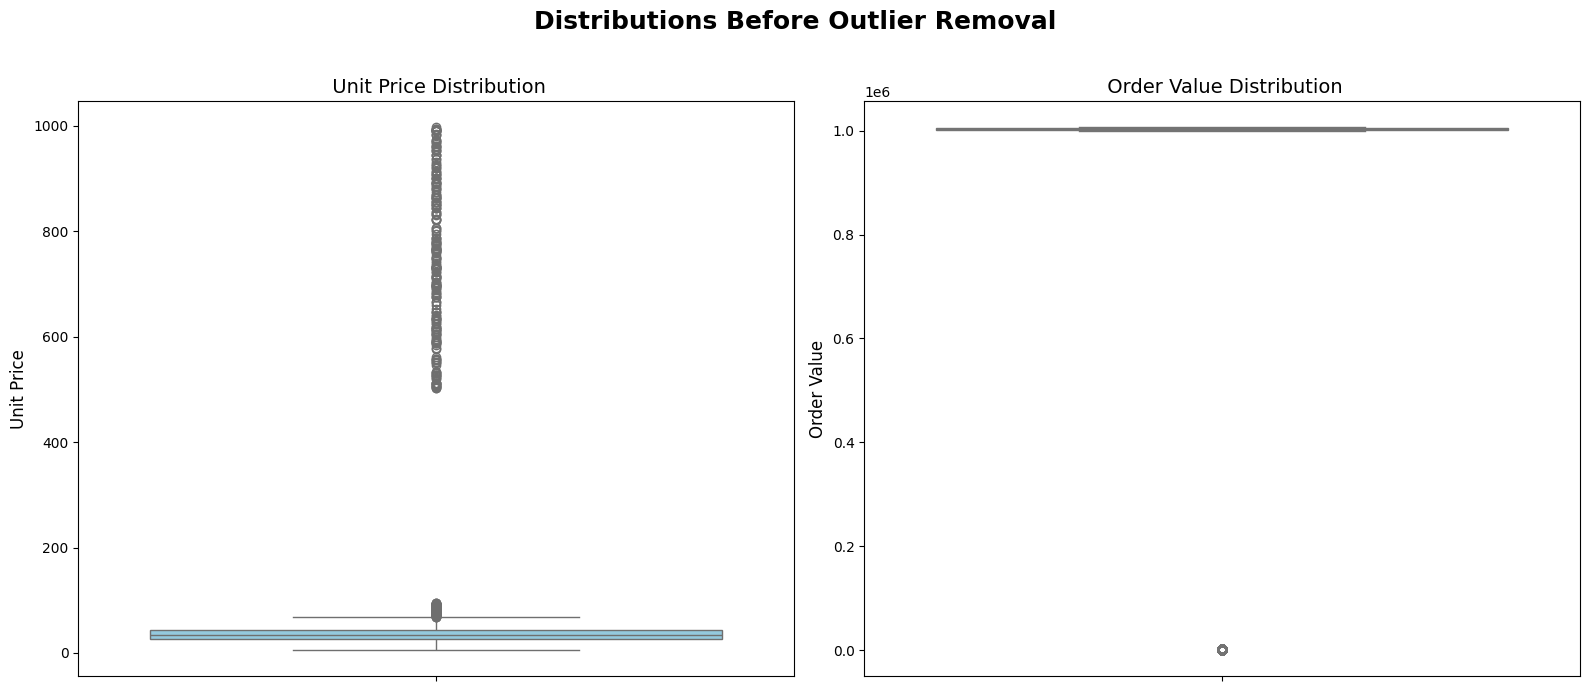

In [28]:
# Set up a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Distributions Before Outlier Removal', fontsize=18, weight='bold')

# Box Plot for Unit Price
sb.boxplot(ax=axes[0], y=df['Unit_Price'], color='skyblue')
axes[0].set_title(' Unit Price Distribution', fontsize=14)
axes[0].set_ylabel('Unit Price', fontsize=12)

# Box Plot for Order Value
sb.boxplot(ax=axes[1], y=df['Order_Value'], color='lightgreen')
axes[1].set_title(' Order Value Distribution', fontsize=14)
axes[1].set_ylabel('Order Value', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.show()

* it will show the ouliers of both colums of ordervalue and unit price,
* i am not removing outliers from  grossprofit colum because it can be loss sometime and somtimes profits it's not depend on market volatile.
* but i can't say that in order value and unit price because it's depends on market volatile and demand of the product.

In [31]:
original_rows = len(df)
for column in ['Unit_Price', 'Order_Value']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Overwrite the original DataFrame with the cleaned data
    # This is the key step. We filter df and assign the result back to df itself.
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
new_rows = len(df)
# Verify the changes 
print(f"Original number of rows: {original_rows}")
print(f"New number of rows in df: {new_rows}")
print(f"{original_rows - new_rows} outlier rows were removed from the original DataFrame.")

print("\nThe updated DataFrame now looks like this:")
print(df.head())


Original number of rows: 10000
New number of rows in df: 8737
1263 outlier rows were removed from the original DataFrame.

The updated DataFrame now looks like this:
   Order_ID Product_Category  Unit_Price  Number_of_Units  Order_Value  \
0         1                A       42.89            23342   1001156.08   
1         2                B       42.01            23881   1003270.75   
2         3                B       45.11            22257   1003906.39   
3         4                C       31.60            31683   1001226.68   
4         5                C       40.06            25005   1001697.26   

   Gross_Profit  
0     500574.88  
1     501644.84  
2     501953.69  
3     500627.23  
4     500855.18  


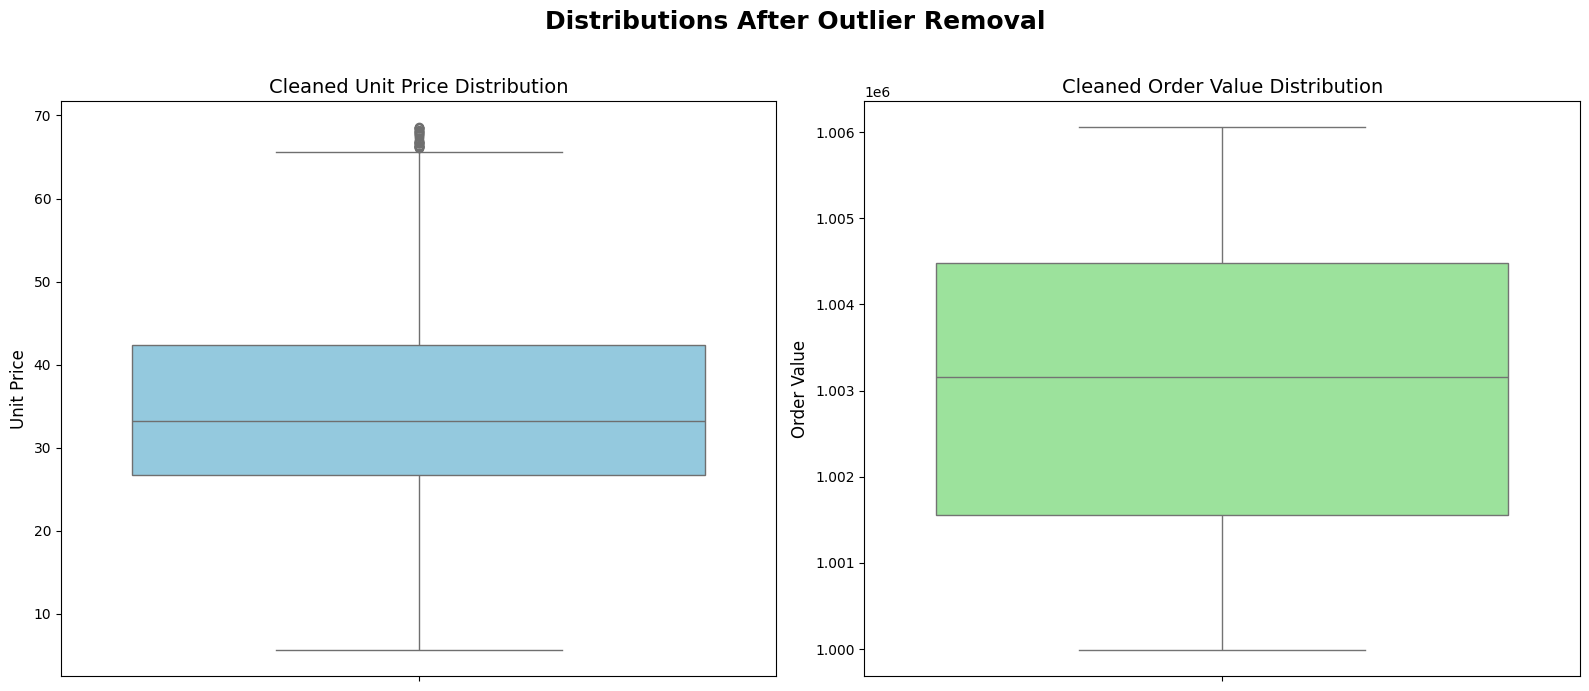

In [32]:
# Set up a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Distributions After Outlier Removal', fontsize=18, weight='bold')

# Box Plot for Unit Price
sb.boxplot(ax=axes[0], y=df['Unit_Price'], color='skyblue')
axes[0].set_title('Cleaned Unit Price Distribution', fontsize=14)
axes[0].set_ylabel('Unit Price', fontsize=12)

# Box Plot for Order Value
sb.boxplot(ax=axes[1], y=df['Order_Value'], color='lightgreen')
axes[1].set_title('Cleaned Order Value Distribution', fontsize=14)
axes[1].set_ylabel('Order Value', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.show()

In [35]:
df.to_csv('Cleaned_Data.csv', index=False)

* **I used Three different charts to find the the insights from it**
> 1. Bar chart used for to interprect the which category product has high gross profit
> 2. histogram used to how my order value is often distributed over frequency
> 3. pie chart used to calculate on which category have contributes more to my business.

C:\Users\gandu\AppData\Local\Temp\ipykernel_32388\3657466042.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(ax=axes[0, 0], x=profit_by_category.index, y=profit_by_category.values, palette='plasma')


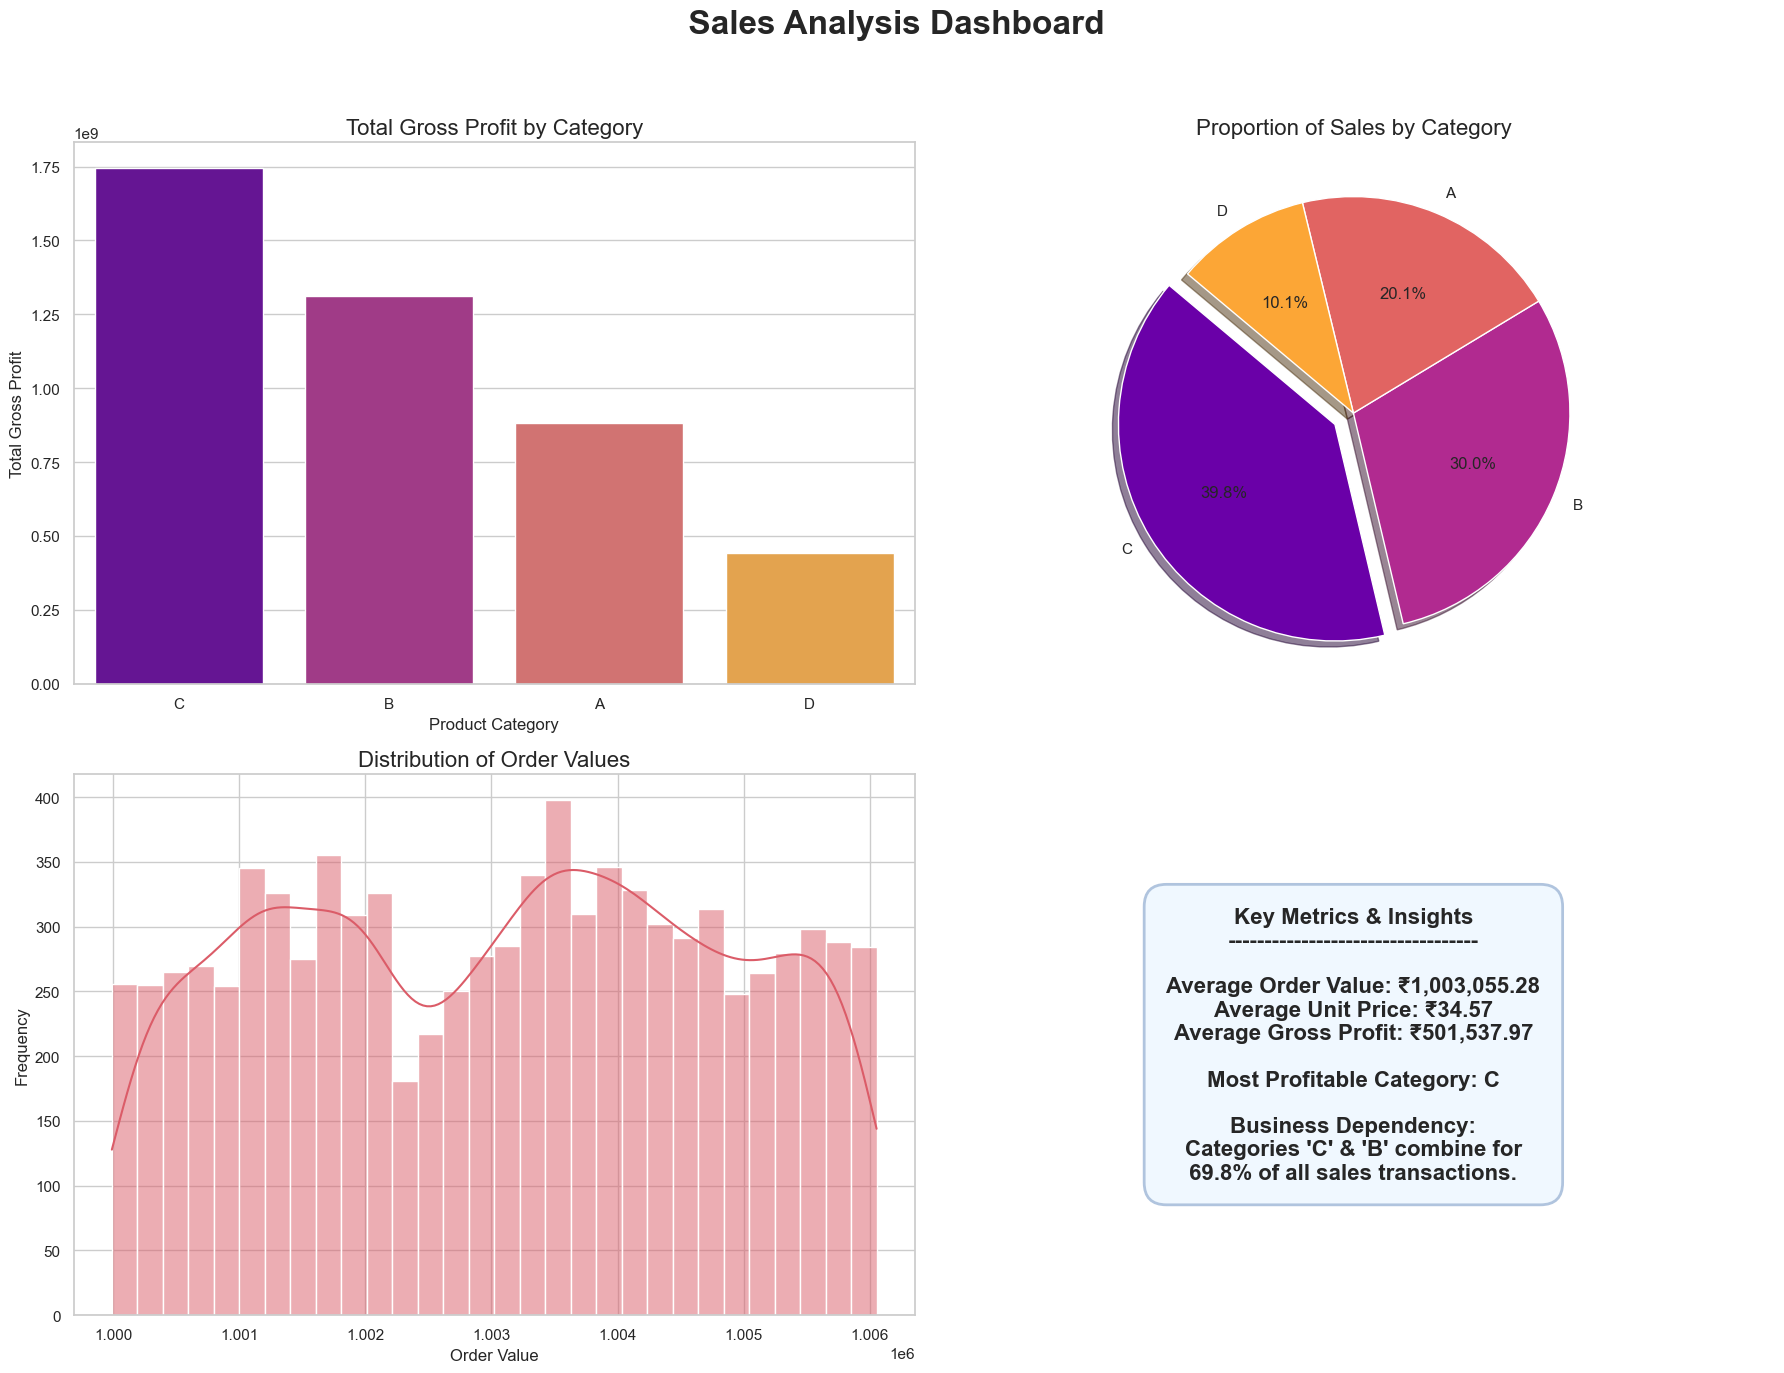

In [34]:
# Create the Final Analysis Dashboard
# Set the theme for the plots
sb.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
fig.suptitle(' Sales Analysis Dashboard', fontsize=24, weight='bold')

# Plot 1 (Top-Left): Bar Chart of Profit by Category
profit_by_category = df.groupby('Product_Category')['Gross_Profit'].sum().sort_values(ascending=False)
sb.barplot(ax=axes[0, 0], x=profit_by_category.index, y=profit_by_category.values, palette='plasma')
axes[0, 0].set_title('Total Gross Profit by Category', fontsize=16)
axes[0, 0].set_xlabel('Product Category', fontsize=12)
axes[0, 0].set_ylabel('Total Gross Profit', fontsize=12)

# Plot 2 (Top-Right): Pie Chart of Sales Count by Category
category_counts = df['Product_Category'].value_counts()
explode = [0.1 if i == 0 else 0 for i in range(len(category_counts))]
axes[0, 1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
               startangle=140, explode=explode, shadow=True,
               colors=sb.color_palette('plasma', len(category_counts)))
axes[0, 1].set_title('Proportion of Sales by Category', fontsize=16)

# Plot 3 (Bottom-Left): Histogram of Order Values
sb.histplot(ax=axes[1, 0], data=df, x='Order_Value', bins=30, kde=True, color=sb.color_palette('plasma')[3])
axes[1, 0].set_title('Distribution of Order Values', fontsize=16)
axes[1, 0].set_xlabel('Order Value', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Slot 4 (Bottom-Right): Key Metrics Summary
axes[1, 1].axis('off')
total_profit = df['Gross_Profit'].sum()
avg_order_value = df['Order_Value'].mean()
most_profitable_cat = profit_by_category.index[0]
avg_unit_price = df['Unit_Price'].mean()
avg_gross_profit = df['Gross_Profit'].mean()

top_two_cats = category_counts.head(2)
top_two_combined_pct = top_two_cats.sum() / category_counts.sum() * 100
cat1_name = top_two_cats.index[0]
cat2_name = top_two_cats.index[1]

summary_text = (
    f"Key Metrics & Insights\n"
    f"----------------------------------\n\n"
    f"Average Order Value: ₹{avg_order_value:,.2f}\n"
    f"Average Unit Price: ₹{avg_unit_price:,.2f}\n"
    f"Average Gross Profit: ₹{avg_gross_profit:,.2f}\n\n"
    f"Most Profitable Category: {most_profitable_cat}\n\n"
    f"Business Dependency:\n"
    f"Categories '{cat1_name}' & '{cat2_name}' combine for\n"
    f"{top_two_combined_pct:.1f}% of all sales transactions."
)

axes[1, 1].text(0.5, 0.5, summary_text,
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=16,
                fontweight='bold',
                wrap=True,
                bbox=dict(boxstyle='round,pad=1', fc='aliceblue', ec='lightsteelblue', lw=2))

# Final layout fixing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
